In [1]:
import tensorflow as tf
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [2]:
#3-a
def theta(t):
    return np.pi/6 + 0.5*np.pi*(t**2)

def position(L, theta):
    return L*np.cos(theta), L*np.sin(theta)

In [3]:
t = np.linspace(0,2,100)
L = 0.5
p_val = position(L, theta(t))
np.array(p_val)

array([[ 0.4330127 ,  0.43285234,  0.4323702 ,  0.43156308,  0.43042566,
         0.42895054,  0.42712822,  0.42494719,  0.42239396,  0.41945308,
         0.41610729,  0.4123375 ,  0.40812297,  0.40344134,  0.39826883,
         0.39258032,  0.38634949,  0.37954907,  0.37215096,  0.36412645,
         0.35544652,  0.346082  ,  0.33600393,  0.32518384,  0.31359409,
         0.30120822,  0.28800134,  0.27395056,  0.25903544,  0.24323841,
         0.22654531,  0.20894591,  0.19043442,  0.17101007,  0.15067767,
         0.12944822,  0.10733949,  0.0843766 ,  0.06059265,  0.03602927,
         0.0107372 , -0.0152232 , -0.04178143, -0.06885641, -0.09635613,
        -0.12417728, -0.15220508, -0.18031311, -0.20836333, -0.23620617,
        -0.26368082, -0.29061563, -0.3168287 , -0.34212866, -0.36631563,
        -0.38918246, -0.41051606, -0.4300991 , -0.44771184, -0.46313426,
        -0.4761484 , -0.48654091, -0.49410585, -0.49864771, -0.49998458,
        -0.49795149, -0.49240388, -0.4832212 , -0.4

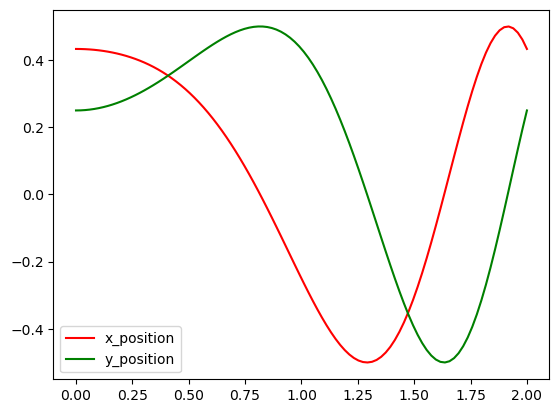

In [4]:
plt.plot(t, p_val[0],'r', label='x_position')
plt.plot(t, p_val[1],'g', label='y_position')
plt.legend()
plt.show()

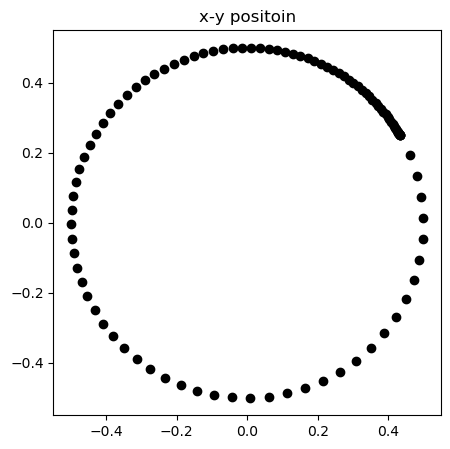

In [5]:
plt.figure(figsize=(5,5))
plt.plot(p_val[0], p_val[1],'ko')
plt.title('x-y positoin')
plt.show()

In [6]:
#3-b
L, t = sp.symbols('L, t')
omega = sp.tanh(t) + t
theta = sp.integrate(omega,t)
theta0 = np.pi/6
theta_const = -theta.subs(t,0) + theta0
theta += theta_const
theta

t**2/2 + t - log(tanh(t) + 1) + 0.523598775598299

In [7]:
position_sp = (L*sp.cos(theta), L*sp.sin(theta))
position_sp

(L*cos(t**2/2 + t - log(tanh(t) + 1) + 0.523598775598299),
 L*sin(t**2/2 + t - log(tanh(t) + 1) + 0.523598775598299))

In [8]:
t_val = np.linspace(0,2,100)
pos_val = []
for pos in position_sp:
    pos_val_dummy = []
    for t_unit in t_val:
        pos_val_dummy.append(pos.subs([(L,0.5), (t, t_unit)]))
    pos_val.append(pos_val_dummy)
np.array(pos_val)

array([[0.433012701892219, 0.432910638900131, 0.432604059115095,
        0.432091791877320, 0.431371891974531, 0.430441648469442,
        0.429297597050891, 0.427935535901130, 0.426350545069285,
        0.424537009338282, 0.422488644569628, 0.420198527507092,
        0.417659129016694, 0.414862350736372, 0.411799565104138,
        0.408461658728598, 0.404839079060158, 0.400921884315221,
        0.396699796599037, 0.392162258165648, 0.387298490745526,
        0.382097557863023, 0.376548430056605, 0.370640052905032,
        0.364361417752166, 0.357701635011914, 0.350650009922935,
        0.343196120610202, 0.335329898297272, 0.327041709499187,
        0.318322440011375, 0.309163580494674, 0.299557313440792,
        0.289496601286049, 0.278975275424299, 0.267988125852417,
        0.256530991163794, 0.244600848586953, 0.232195903747700,
        0.219315679814350, 0.205961105666445, 0.192134602708273,
        0.177840169929402, 0.163083466795502, 0.147871893534133,
        0.132214668361961

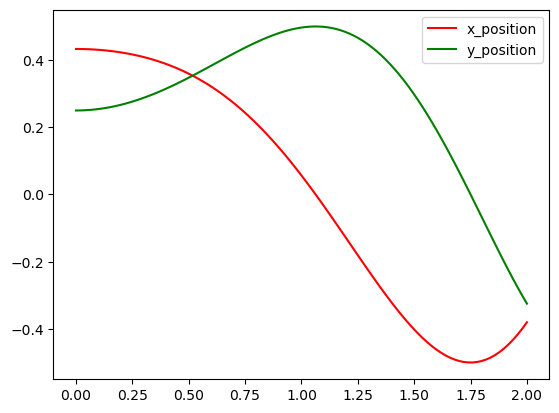

In [9]:
plt.plot(t_val, pos_val[0],'r', label='x_position')
plt.plot(t_val, pos_val[1],'g', label='y_position')
plt.legend()
plt.show()

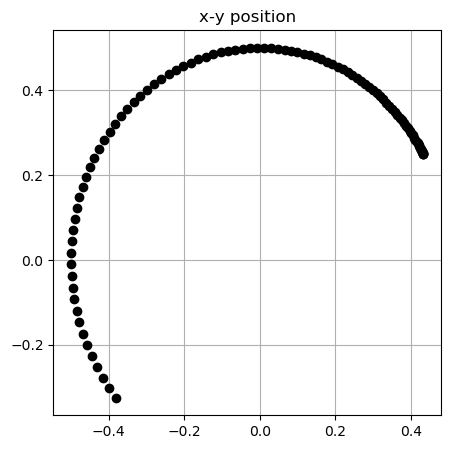

In [10]:
plt.figure(figsize=(5,5))
plt.plot(pos_val[0], pos_val[1], 'ko')
plt.grid(True)
plt.title('x-y position')
plt.show()

In [11]:
#3-c
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [12]:
optimizer = tf.keras.optimizers.Adam(1e-2)

In [13]:
def loss_fn(y_true, y_pred):
    loss = tf.math.square(y_true - y_pred)
    return tf.math.reduce_mean(loss)

In [14]:
def omega(model, t):
    with tf.GradientTape() as tape:
        t_tf = tf.constant(t)
        tape.watch(t_tf)
        theta = model(t_tf)
    omega_cal = tape.gradient(theta, t_tf)
    del tape
    return omega_cal

In [15]:
t = np.linspace(0,2,100)

In [16]:
epochs = 1000
for num_epoch in range(epochs):
    with tf.GradientTape() as tape:
        omega_cal = omega(model, t)
        loss1 = loss_fn(np.pi, omega_cal)
        loss2 = loss_fn(np.pi/6, model(tf.constant([0.])))
        loss = tf.cast(loss1, dtype='float32') + loss2
    grads = tape.gradient(loss, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))
    print('Epoch %s : Loss %.4f' % (num_epoch, loss.numpy()))

Epoch 0 : Loss 13.2665
Epoch 1 : Loss 12.8234
Epoch 2 : Loss 12.4080
Epoch 3 : Loss 12.0191
Epoch 4 : Loss 11.6554
Epoch 5 : Loss 11.3147
Epoch 6 : Loss 11.0360
Epoch 7 : Loss 10.7716
Epoch 8 : Loss 10.5204
Epoch 9 : Loss 10.2816
Epoch 10 : Loss 10.0544
Epoch 11 : Loss 9.8375
Epoch 12 : Loss 9.6297
Epoch 13 : Loss 9.4404
Epoch 14 : Loss 9.2831
Epoch 15 : Loss 9.1269
Epoch 16 : Loss 8.9702
Epoch 17 : Loss 8.8117
Epoch 18 : Loss 8.6507
Epoch 19 : Loss 8.5098
Epoch 20 : Loss 8.3544
Epoch 21 : Loss 8.1871
Epoch 22 : Loss 8.0069
Epoch 23 : Loss 7.8127
Epoch 24 : Loss 7.6037
Epoch 25 : Loss 7.3792
Epoch 26 : Loss 7.1385
Epoch 27 : Loss 6.8813
Epoch 28 : Loss 6.6073
Epoch 29 : Loss 6.3165
Epoch 30 : Loss 6.0091
Epoch 31 : Loss 5.6855
Epoch 32 : Loss 5.3466
Epoch 33 : Loss 4.9934
Epoch 34 : Loss 4.6277
Epoch 35 : Loss 4.2526
Epoch 36 : Loss 3.8689
Epoch 37 : Loss 3.4801
Epoch 38 : Loss 3.0884
Epoch 39 : Loss 2.6991
Epoch 40 : Loss 2.3166
Epoch 41 : Loss 1.9462
Epoch 42 : Loss 1.5936
Epoch 43 :

4/4 [==============================] - 0s 1ms/step


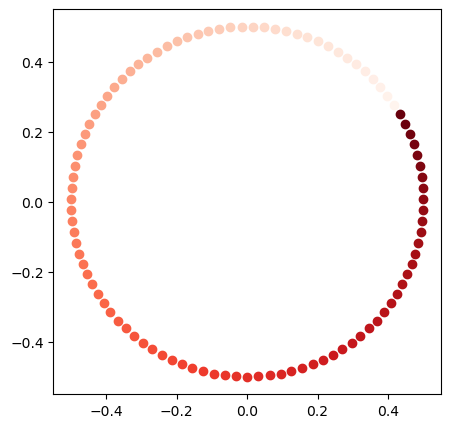

In [17]:
from matplotlib.pyplot import cm
color = cm.Reds(np.linspace(0,1,100))
theta = model.predict(t)
plt.figure(figsize=(5,5))
for x, y, c in zip(0.5*np.cos(theta), 0.5*np.sin(theta), color):
    plt.scatter(x,y,color=c)

In [18]:
t = np.linspace(0,2,100)
omega_measured = np.pi + 0.01*np.random.normal(size=(100,))

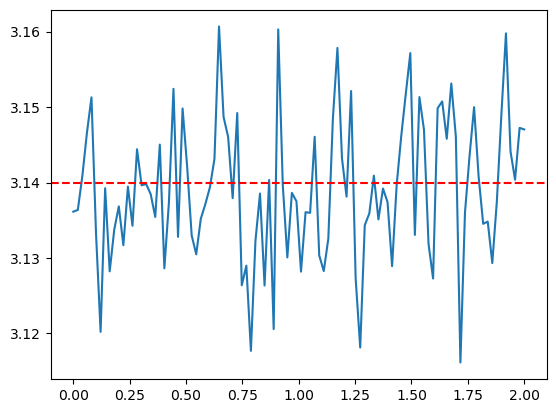

In [19]:
plt.plot(t, omega_measured)
plt.axhline(y = 3.14, color='r', linestyle='--')
plt.show()